# **Lab7 - Linear Regression**

## Introduction

At the end of this laboratory, you should be able to:

*   perform ordinary least squares (OLS) linear regression
*   perform multiple linear regression
*   perform basic polynomial regression
*   perform residual analysis

Reminder: you need to show your results / submit this jupyter file to have your lab credited.

Now, let us begin!

First, let us import the standard packages that we need. We might need to install some packages in python in our local drive as needed. However, this file was checked to work in Google Colab as of 2023-09-24.

In [1]:
# import packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ordinary Least Squares (OLS) Linear Regression

The basic form of regression is used when the dependent variables and the independent variable are both numerical. In contast to classification problem, where the outputs are known categories, the most well-known regression methods has a continuous numerical variable as the output. This allows us, using a given set of features, predict values of the dependent variable. In this section let us consider a single independent variable first.

Let us take an example using the Iris data set. Can we predict the petal width ($y$) if we know the sepal length($x$)? The model is often written as $$\hat{y}=ax+b+\epsilon$$ where $\epsilon$ is the error.

OLS is the simples and most common estimatore where the values of $a,b$ are determined so that the distance between actual ($y$) and predicted ($\hat{y}$) values are as small as possible, i.e. minimize the error $d=||ax+b-y||$. The most common form of distance used is the Euclidean distance ($SSE=\sum_{j=1}^n d_j^2 $).

While the learning algorithm still does the routine methods internally, the values of $a,b$ are already known by analytical methods. Nevertheless, let us demonstrate how this works in a code.

In [2]:
# url='https://raw.githubusercontent.com/emmanuelplan-hsb/hsb3119_data2023/main/Iris.csv'
# df_iris=pd.read_csv(url)
# df_iris.head()
## OR
url='./hsb3119data/Iris.csv'
df_iris=pd.read_csv(url)
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Before we run regressions, let us visualize.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

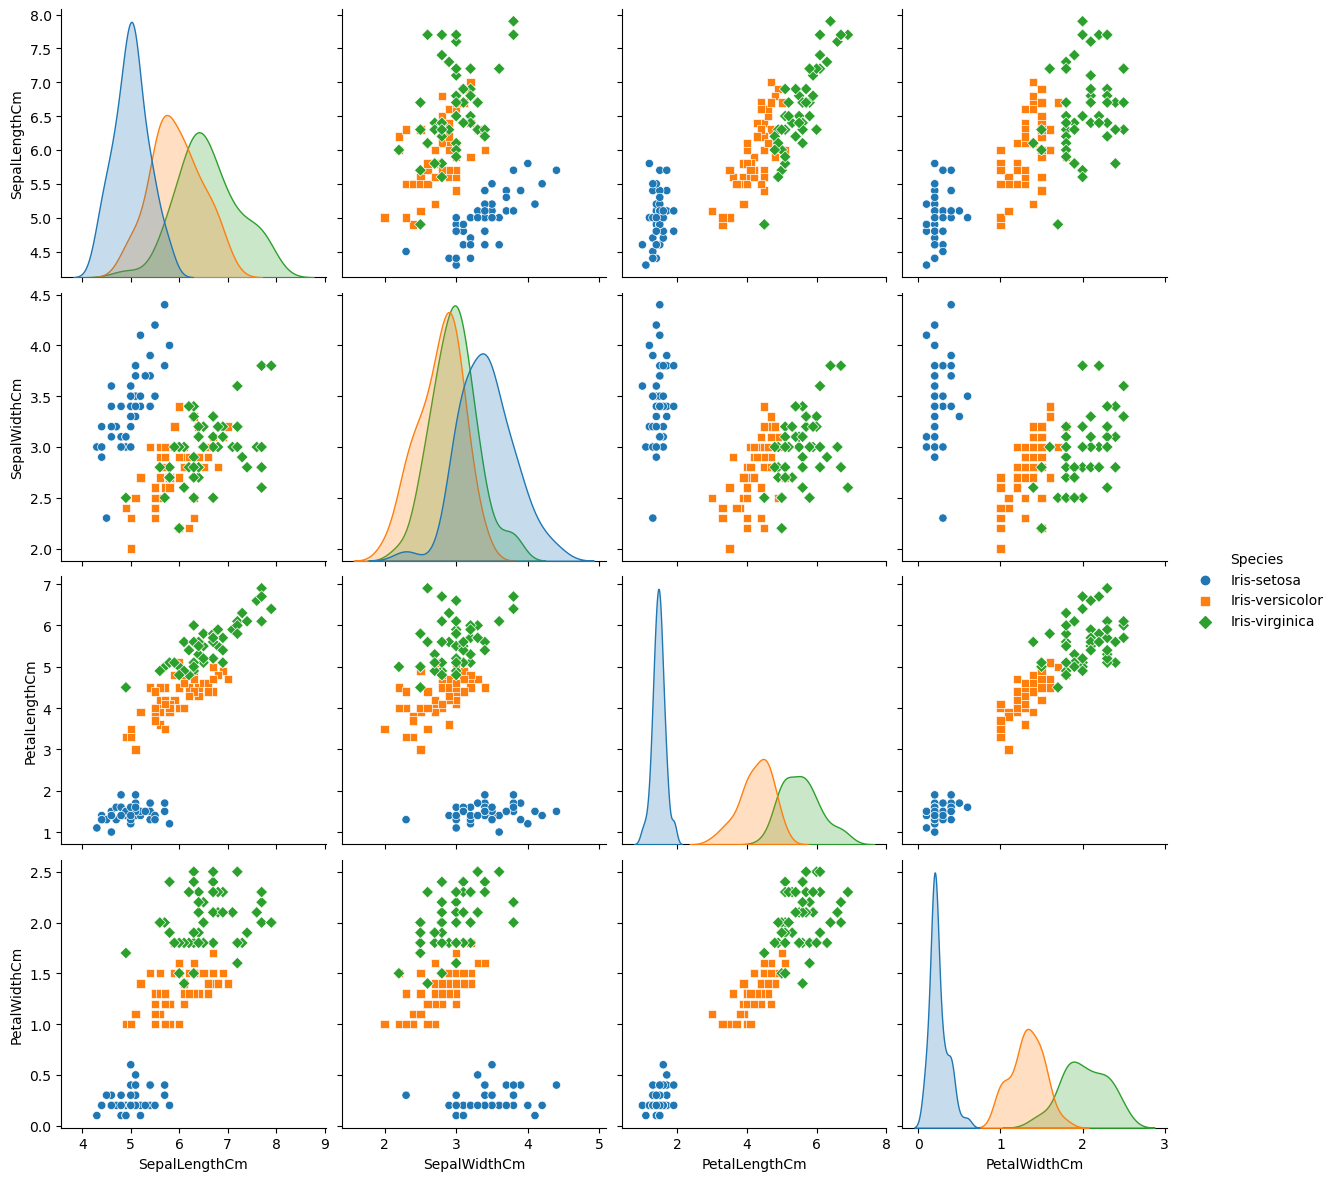

In [3]:
import seaborn as sns
%matplotlib inline

plt.figure()
sns.pairplot(df_iris.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

The chart we want is in the 4th row, 3rd column. Let us draw that separately and not make a distinction based on its label.

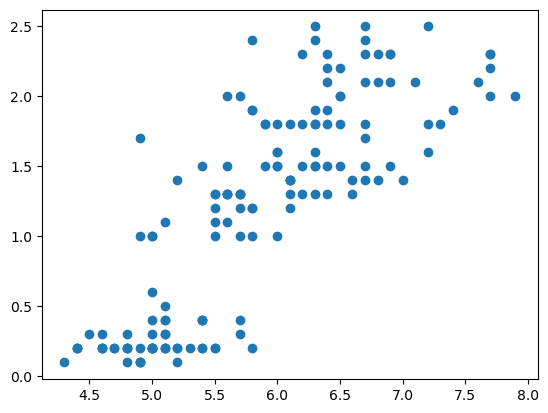

In [4]:
x=df_iris['SepalLengthCm']
y=df_iris['PetalWidthCm']
plt.scatter(x,y)
plt.show()

Now let us use scikit-learn to find the best model. Note that in Data Analysis, we have used something else.

In [5]:
from sklearn.linear_model import LinearRegression
est = LinearRegression(fit_intercept=True)
x=df_iris[['SepalLengthCm']]
y=df_iris[['PetalWidthCm']]
est.fit(x,y)
print("The cofficient(s) a is(are)",est.coef_)
print("The intercept b is", est.intercept_)

The cofficient(s) a is(are) [[0.75384088]]
The intercept b is [-3.2062769]


In [6]:
from sklearn.linear_model import LinearRegression
est2 = LinearRegression(fit_intercept=False)
x=df_iris[['SepalLengthCm']]
y=df_iris[['PetalWidthCm']]
est2.fit(x,y)
print("The cofficient(s) b is(are)",est2.coef_)
print("The intercept a is", est2.intercept_)

The cofficient(s) b is(are) [[0.21586569]]
The intercept a is 0.0


This means that we can probably estimate the sepal length given the petal width using the equation $\hat{y}=0.75384x-3.20628$. In two dimensions, it is not difficult to plot this line. We can show the equation by adding annotations.

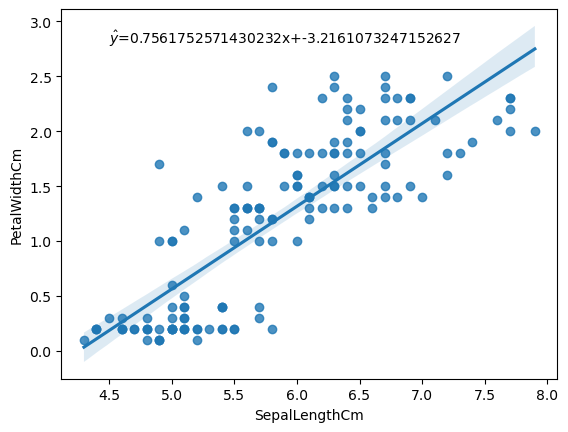

In [18]:
x=df_iris['SepalLengthCm']
y=df_iris['PetalWidthCm']
sns.regplot(x=x,y=y)

equation='$\hat{y}$='+str(est.coef_[0][0])+'x+'+str(est.intercept_[0])
# Above is an ugly way to get the equation
plt.annotate(equation, xy=(4.5,2.8))
# xy above gives the position of the lower left corner of the start of the annotation

plt.show()

When doing classification, we use the confusion matrix along with other metrics to evaluate how good the model is. How do we do that for regression? Here, we have a coefficient of determination called $R^2$. This can be done using *score()*. Moreover, we can also predict future values using *.predict()*.

Now, let us re-do the entire process but performing a train-test split.

In [25]:
from sklearn.model_selection import train_test_split

testperc=0.5
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = testperc, random_state = 0)
est = LinearRegression(fit_intercept=True)
est.fit(pd.DataFrame(X_train),pd.DataFrame(y_train))

print("The cofficient(s) b is(are)",est.coef_)
print("The intercept a is", est.intercept_)

The cofficient(s) b is(are) [[0.77308764]]
The intercept a is [-3.36053457]


Note that the coefficients changed because we changed our sample to only 80% of the data. Let us see how the *.predict()* and *.score()* works.

In [26]:
y_pred=est.predict(pd.DataFrame(X_test))
y_pred

array([[ 1.12337376],
       [ 1.27799129],
       [ 0.89144747],
       [ 2.28300522],
       [ 0.50490365],
       [ 1.50991758],
       [ 0.50490365],
       [ 1.81915264],
       [ 1.8964614 ],
       [ 1.35530005],
       [ 1.35530005],
       [ 1.58722634],
       [ 1.35530005],
       [ 1.66453511],
       [ 1.35530005],
       [ 0.42759488],
       [ 1.27799129],
       [ 0.89144747],
       [ 0.35028612],
       [ 0.8141387 ],
       [ 0.96875623],
       [ 0.96875623],
       [ 0.35028612],
       [ 0.04105106],
       [ 1.43260882],
       [ 0.19566859],
       [ 0.58221241],
       [ 1.43260882],
       [ 0.50490365],
       [ 0.50490365],
       [ 1.58722634],
       [ 0.8141387 ],
       [ 0.65952117],
       [ 1.35530005],
       [ 1.58722634],
       [ 0.65952117],
       [ 1.04606499],
       [ 1.27799129],
       [ 1.20068252],
       [ 1.12337376],
       [ 1.8964614 ],
       [ 0.27297735],
       [ 1.97377016],
       [ 0.50490365],
       [ 0.8141387 ],
       [ 0

In [27]:
est.score(pd.DataFrame(X_test),pd.DataFrame(y_test))

0.5653110487795878

Is 0.57 good or bad? Here is a snapshot from scikit-learn.

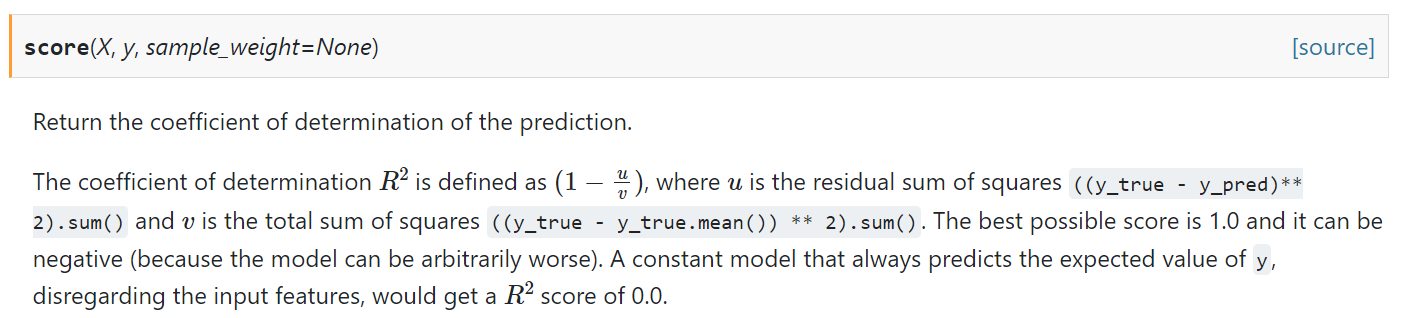

For our class, we generally consider the model to have strong linear relationship if $R^2>=0.7$. If $R^2>=0.3$ then the model linear relationship is moderate. Note however that this interpretation varies from one subject area to another.

You will have an exercise below, after polynomial regression.

## Residual Analysis

We now want to do a plot to analyze the residuals. Let us first look at the case for the simple linear regression above between petal width and sepal length. Recall that "est.predict(pd.DataFrame(X_test))" gave us the prediction for the testing set. The residual is the difference between y_test and y_pred. 

First let us put them into the same data type (to a numpy array)

In [28]:
y_pred=y_pred.ravel() # ravel decreases the dimension of our array
y_test=y_test.to_numpy() # converts the series to a numpy array

Now we can calculate the residuals, and can plot histograms and scatterplots of it.

In [29]:
resid=y_test-y_pred
print(resid)

[ 1.27662624 -0.27799129 -0.69144747 -0.48300522 -0.30490365  0.99008242
 -0.20490365 -0.31915264 -0.4964614  -0.05530005  0.04469995 -0.08722634
 -0.15530005 -0.16453511  0.04469995 -0.32759488  0.22200871  0.30855253
 -0.05028612 -0.4141387   1.03124377  0.53124377 -0.15028612  0.15894894
  0.36739118  0.00433141 -0.18221241 -0.13260882  0.49509635 -0.10490365
  0.21277366  0.6858613  -0.45952117  0.44469995  0.61277366  0.74047883
 -0.74606499  0.32200871  0.29931748  0.07662624  0.2035386  -0.07297735
  0.32622984  0.09509635 -0.6141387   0.49509635  0.13546489  0.68084736
  0.22200871 -0.01915264  0.13124377 -0.29224028  0.09008242  0.20855253
  0.29008242 -0.00991758  1.27240512  0.39008242 -0.65107893  0.33546489
  0.32200871 -0.15028612  0.77662624  0.33124377  0.33124377  0.40855253
  0.04469995 -0.40569646 -0.53682994  0.1362577   0.31277366  0.15393501
 -0.6141387  -0.64606499 -0.47377016]


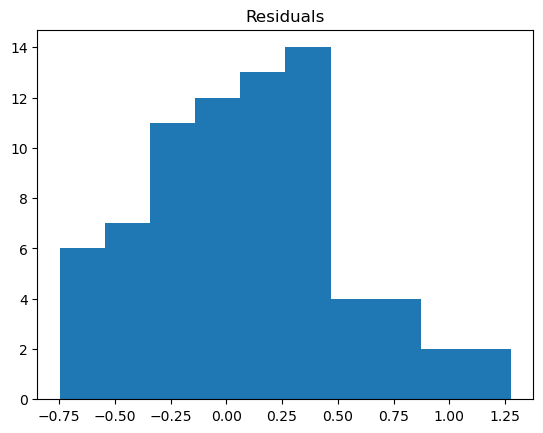

In [34]:
plt.hist(resid, bins=10)
plt.title("Residuals")
plt.show()

With 10 bins, this doesn't look normal enough. There are more negative residuals (y_pred gives larger values than actual y_test values). However, it is hard to complain when the test size is only 30 points. Let us have a look at our training data...

In [ ]:
y_pred2=est.predict(pd.DataFrame(X_train)).ravel()
y_test2=y_train.to_numpy()
resid2=y_test2-y_pred2
plt.hist(resid2, bins=7)
plt.title("Residuals")
plt.show()

As you can see, our training data is looks good enough, but still not good (with very limited data).

Now let us do another visual check. We already know that our residuals for the test data is awful (not normal). We can also have a look at the QQ plot (and confirm that it is indeed quite far from normal). Note that we willl need stasmodels to make a QQ plot.

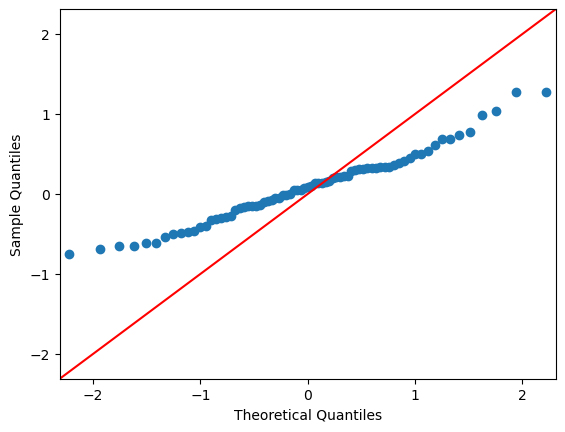

In [35]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = sm.qqplot(resid, line='45') #QQ plot with 45-degree line
plt.show()

Note, more modern versions of sklearn have a quick way to plot residuals. Code is given below.

In [ ]:
# from sklearn.metrics import PredictionErrorDisplay
# display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
# display.plot()
# plt.show()

Lastly, let us also look at the scatterplot distributions of residual vs x_test (to see normality) and vs. t_test (to check homoscedasticity).

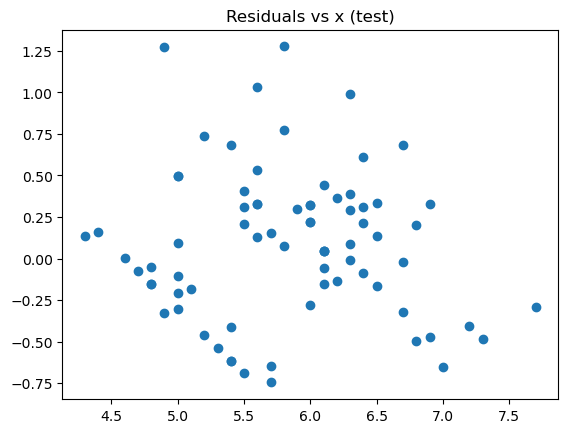

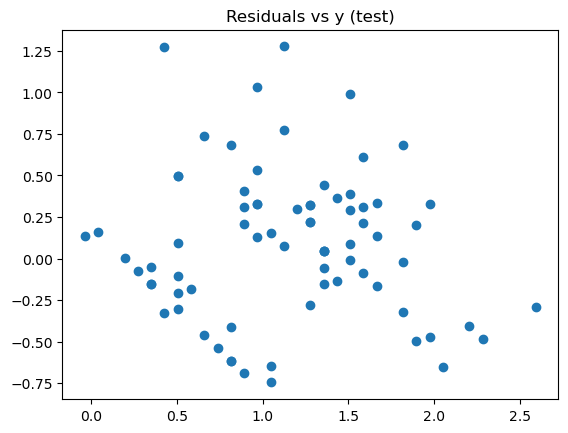

In [36]:
plt.scatter(X_test,resid)
plt.title('Residuals vs x (test)')
plt.show()
plt.scatter(y_pred,resid)
plt.title('Residuals vs y (test)')
plt.show()

In the first figure, there does not seem to be a very conclusive pattern, but at the same time, it does not look like it is randomly-scattered. Why? Largely, it is because there are three types of flowers, and there is a strong possibility that there are different effects on the residuals based on the types of flowers. This confirms the results of non-normality in the histogram.

As for homoscedasticity, the limited data tells us that there seems to be an increase in variance of the residuals when y_pred is near 1-1.5. This isn't very good.

The best way to remedy the problems above, given this situation, is to increase the dataset, because the model seems fine but the limited data does not allow good residual analysis. Moreover, the types of flowers possibly affect the regression analysis.

**N.B.** While we will not, at this point, consider fixes to this, in real life, this has to be addressed. Common fixes include transforming the data. Indeed, for this case, we skipped the standardization step (because the sccale or "size" of the values are roughly the same). For this particular case, regression might have to be done separately, or using a moderating variable (something that can affect the strength or direction of a regression line).

### Checking for autocorrelation

The Durbin-Watson test can be done in Python to see if the residuals are independent or autocorrelated. We want the DW statistic to be between 1 and 3 most of the time. Values near 0 and 4 are rather bad. As above in QQ plot, we need statsmodels to perform our test.

In [37]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(resid)

1.7526607313124505

This doesn't look so bad!

## Multiple Linear Regression

Part of this discussion is adapted from the Lab 8 (Multiple Linear Regression) from MET 4 HSB1003 Data Analysis Class. 

Performing multiple linear regession in Python is now actually easy. All you need is to increase the number of features (or columns) in $X$. But first, let us understand what we are doing. Instead of the single-variable equation, we now have...

$$\hat{y}=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n.$$

Note the difference in notation (the intercept is $\beta_0$ and the coefficients are $\beta_i$). This can also be written in vector notation as $\hat{y}=\beta_0+\beta x$, where $\beta$ will be a matrix.

For our first example, let us see if we can predict the PetalWidthCm using the 3 other features. We expect an equation $$\hat{y}=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3.$$

As before, after fitting, we can get the intercept $\beta_0$ and coefficients $\beta_1, \beta_2, \beta_3$ by using the methods *.intercept_* and *.coef_*.

In [38]:
from sklearn.linear_model import LinearRegression
est = LinearRegression(fit_intercept=True)
x=df_iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm']]
y=df_iris[['PetalWidthCm']]
est.fit(x,y)
print("The cofficient(s) a is(are)",est.coef_)
print("The intercept b is", est.intercept_)

The cofficient(s) a is(are) [[-0.21027133  0.22877721  0.52608818]]
The intercept b is [-0.24872359]


Let us do this again, with the train-test split.

In [39]:
testperc=0.2
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = testperc, random_state = 0)
est = LinearRegression(fit_intercept=True)
est.fit(pd.DataFrame(X_train),pd.DataFrame(y_train))

print("The cofficient(s) a is(are)",est.coef_)
print("The intercept b is", est.intercept_)
print("The R^2 value (testing data) is", est.score(pd.DataFrame(X_test),pd.DataFrame(y_test)))

The cofficient(s) a is(are) [[-0.19987362  0.20822671  0.52361786]]
The intercept b is [-0.22756723]
The R^2 value (testing data) is 0.8925072472217209


What does this mean? Is this a good $R^2$?

While this may seem good. It is often important to check if the individual variables are all useful in this model. While scikit-learn does not offer this, the package statsmodels does so.

In [40]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train) # This adds an intercept
model = sm.OLS(y_train,X_train2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PetalWidthCm   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     680.9
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.92e-73
Time:                        10:47:57   Log-Likelihood:                 35.997
No. Observations:                 120   AIC:                            -63.99
Df Residuals:                     116   BIC:                            -52.84
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2276      0.185     -1.231      0.221      -0.594       0.138
SepalLengthCm    -0.1999      0.051     -3.911      0.000      -0.301      -0.099
SepalWidthCm      0.2082      0.052      3.970      0.000       0.104       0.312
PetalLengthCm     0.5236      0.026     19.950      0.000       0.472       0.576
==============================================================================
Omnibus:                        5.839   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.329
Skew:                           0.441   Prob(JB):                       0.0696
Kurtosis:                       3.536   Cond. No.                         88.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results below show good things:
1. The p-value of the F-statistic is very small. The linear model does not have all coefficients to be 0.
2. For multiple regression, we usually need the adjusted $R^2$ more. We have it here and fortunately the original $R^2$ is not so far. Moreover, the adjusted $R^2$ shows strong linear relationship.
3. The coefficients are the same as to what we got.
4. All the coefficients are significant because their p-values are small. However, the intercept has a large p-value and we can consider another model without the intercept.

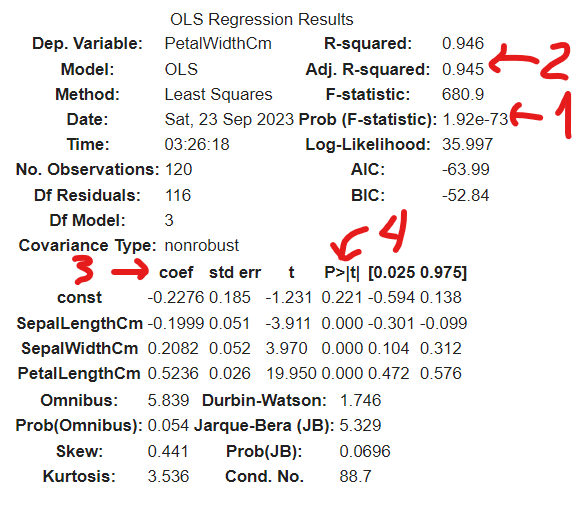



## Polynomial Regression

Sometimes, some of our variables are not linearly-related to our $y$ dependent variable. It doesn't mean that there is no relation, but that the relationship is no linear. While there can be a variety of models (such as exponential, etc...) we consider polynomial regression here (in the context of a multiple linear regression).

1. Most functions can be written as (possibly infinite) polynomials.
2. To reduce to the simple case of having only 1 variable, it is easy to simply omit the other variables.

For this, however, we will only demonstrate using some fake data. Using this in practice will require more steps.

In [41]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

Now that sample data is ready, let us show what the fit and transform does for degree $d=2$.
Given two features (2 columns $a,b$), then it actually outputs all $d=2$-wise combinations of the features of degree less than or equal to d: $(a^0b^0, a^1b^0, a^0b^1, a^2b^0, a^1b^1, a^0b^2)$

In [42]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Let's see that work on some sample data. (Reference 2)




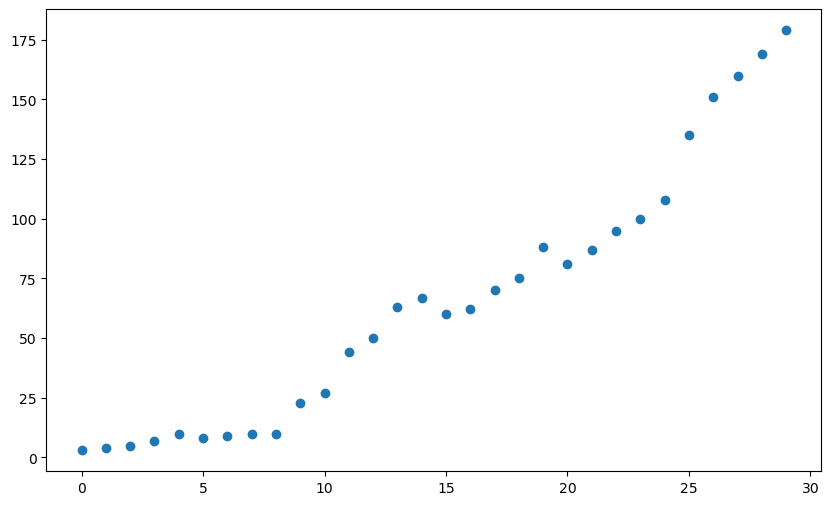

In [43]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

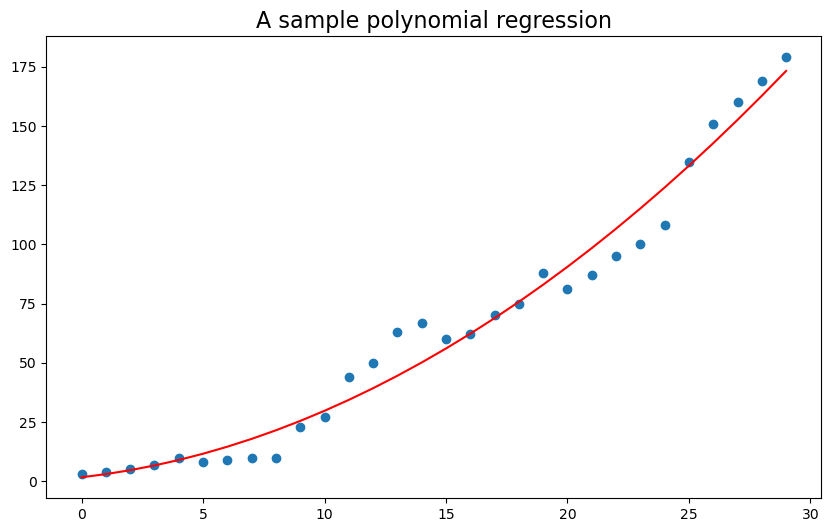

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create the polynomial model
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

# Create the regression model and fit the transformed model into the linear model
# The output goes to y_predicted
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

# Plot
plt.figure(figsize=(10, 6))
plt.title("A sample polynomial regression", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

An example of how to use this in real data is available in Reference 2. However, there are better ways fo doing this especially if the data is big (more features, and higher degrees).

The point of this tutorial is to make you familiar at the existence of these capabilities of Python. The program R has a more straightforward way of addressing polynomial transformation of features.

## Your turn!

1. Perform OLS linear regression on the FIFA World Cup data with $y$ being the overall score and $x$ being the potential score.
  * Split the data into 80% training and 20% testing. Fit the model on the training data and predict the values and evaluate $R^2$ using the testing data.
  * Plot the chart and report the equation and coefficient of determination in the chart (use annotation).
  * Plot the residuals using a scatterplot AND a histogram.
  * Plot a QQ plot and report the Durbin-Watson statistic
  * After the chart, include 3-4 sentences to say if the model is good or not based on the coefficient of determination and residual analysis.

2. Perform multiple linear regression on the FIFA World cup by taking $y$ as overall and using the following columns for $x$. Use 30% for testing.

* Case a: 'pace','shooting','passing','dribbling','defending','physic'. Perform residual analysis.
* [Optional] Case b: columns 44 to 76. Is this better than the one above?

## Challenge

Perform regression on the following dataset. Consider a housing dataset in Boston (see, e.g. https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset). Note that this dataset encountered Ethics issues and must be used with caution; nevertheless, it remains useful for learning purposes.

Here, the goal is to determine the price ($y$) of a house given some of its features $x$ such as how many rooms there are, the floor area of the house, etc.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

df=pd.DataFrame(data)
df['PRICE'] = target
df.columns=column_names

df.head()

In [ ]:
# type your code here

## Congratulations

You have finished this module.

## Acknowledgement, Ownership, and References

This notebook is prepared by Emmanuel Plan (emmanuelplan@hsb.edu.vn) for HSB3119: Introduction to Data Science.


## References
*   Plan, Emmanuel. Lab 8 - Multiple Linear Regression. HSB1003 Lab Tutorials for MET4, 2023.
*   Data36. Polynomial Regression in Python using scikit-learn (with a practical example). Accessed from https://data36.com/polynomial-regression-python-scikit-learn/. Accessed on Sept 23, 2023.


### Changelog

1.   2023-08-24: Drafted initial version
2.   2024-10-08: Added sections on autocorrelation and residual analysis
